# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
# Librerias utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn 
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn
import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Cargar datos de entrenamiento y evaluación
train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

In [3]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
0,-15.0,20.0,26.0,17.0,117.0,-1.099921,-0.366696,0.136307,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
1,35.0,87.0,-17.0,54.0,38.0,-0.507798,-0.774667,-0.879107,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,82.0,75.0,116.0,87.0,130.0,-0.219868,0.157875,0.386982,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,133.0,138.0,87.0,124.0,61.0,0.371992,-0.157556,-0.484258,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-17.0,23.0,17.0,16.0,109.0,-1.099966,-0.436268,0.028073,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
5,85.0,95.0,79.0,90.0,91.0,-0.125094,-0.140394,-0.138070,-0.218882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,152.0,152.0,97.0,138.0,56.0,0.553977,-0.113597,-0.532815,-0.002862,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
7,-52.0,40.0,-102.0,-9.0,22.0,-1.286313,-1.275136,-1.157536,-2.027939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
8,-92.0,6.0,-115.0,-38.0,41.0,-1.686921,-1.300803,-0.940004,-2.168412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
9,105.0,100.0,111.0,104.0,106.0,0.043765,0.076621,0.091104,0.112940,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Ejercicio 1a:

* Primero imprima una descripción básica de los datos.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
0         400 non-null float64
1         400 non-null float64
2         400 non-null float64
3         400 non-null float64
4         400 non-null float64
5         400 non-null float64
6         400 non-null float64
7         400 non-null float64
8         400 non-null float64
9         400 non-null float64
10        400 non-null float64
11        400 non-null float64
12        400 non-null float64
13        400 non-null float64
14        400 non-null float64
15        400 non-null float64
16        400 non-null float64
TARGET    400 non-null float64
dtypes: float64(18)
memory usage: 56.3 KB


`El dataset no tiene datos faltantes o sobre los que haya que trabajar a primera vista. Son todos los datos del tipo float64. Tenemos 18 features y 400 muestras.`

In [5]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
Y_train.value_counts(normalize=True)

-1.0    0.5025
 1.0    0.4975
Name: TARGET, dtype: float64

`La salida toma dos tipos de valores, 1 y -1.`

* Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

In [7]:
X_corr = X_train.corr() # Calculation of the correlation coefficients in pairs

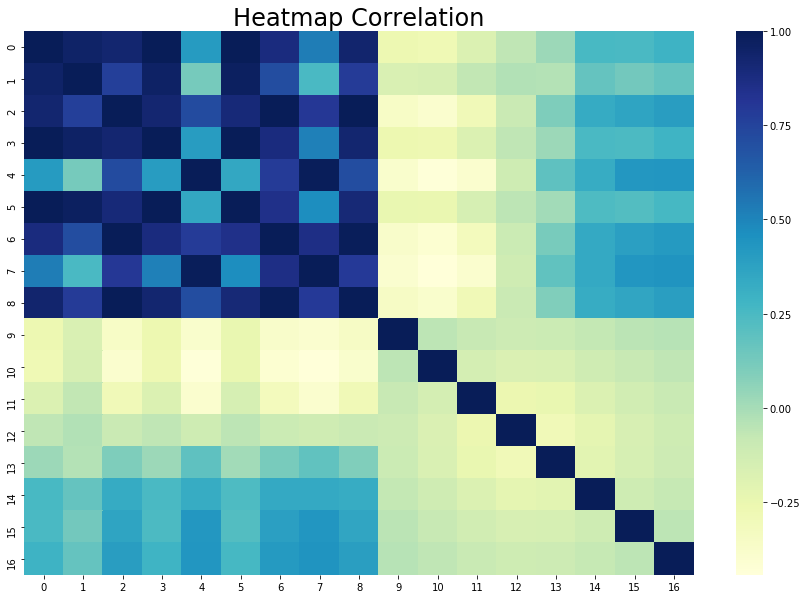

In [8]:
plt.figure(figsize=(15,10))
seaborn.heatmap(X_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')
plt.title('Heatmap Correlation')
plt.show()    

**Preguntas:**
- ¿Qué observa?

`Se observa una fuerte correlación positiva entre las features de la 0 a la 8. Tenemos una correlación positiva leve entre las features de la 0 a la 8 con las features de la 13 a la 16. Y una correlación negativa fuerte entre las features de la 0 a la 8 y las features de la 9 a la 12. Además si observamos las features de la 9 a la 16 contra este mismo rango vemos correlaciones negativas leves.`
- ¿Qué conclusiones puede extraer?

`Las features que casi no poseen correlación o tienen una correlación moderada aportan valor a nuestro modelo. Pero las que tienen correlaciones fuertes no sólo que no aportan valor al modelo sino que pueden llegar a ser causantes de overfitting. Sería interesante aplicar análisis de componentes principales a los datos para quedarse con features significativas.`

* Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

In [9]:
pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_train)
X_train_projected = pd.DataFrame(data = principalComponents_train, columns = ['PCA_1', 'PCA_2'])
X_test_projected = pd.DataFrame(data = principalComponents_test, columns = ['PCA_1', 'PCA_2'])
print('Shape X_train original: '+str(X_train.shape))
print('Shape X_train con PCA: '+str(X_train_projected.shape))

Shape X_train original: (400, 17)
Shape X_train con PCA: (400, 2)


In [10]:
display(X_train_projected)

,PCA_1,PCA_2
0,-169.452309,61.923209
1,-140.637635,-63.051982
2,-9.971975,48.867243
3,28.025112,-61.117568
4,-176.649479,51.593234
5,-28.453538,-5.597614
6,54.742669,-73.930527
7,-286.225438,-57.329041
8,-337.649156,-18.828837
9,12.097505,9.417517


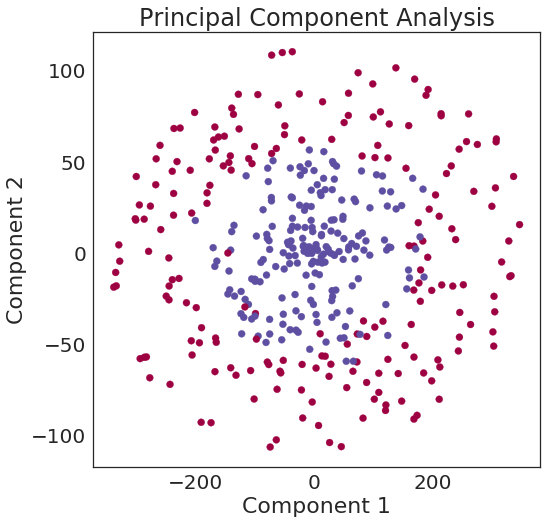

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(X_train_projected['PCA_1'], X_train_projected['PCA_2'], c=Y_train, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1');
plt.ylabel('Component 2');
plt.title('Principal Component Analysis');

**Preguntas:**
- ¿Qué observa?

`En este conjunto de datos se pueden diferenciar bien dos grupos. Pero los mismos siguen sin ser linealmente separables.`
- ¿Qué conclusiones puede extraer?

`Para poder diferenciar correctamente ambos grupos tendríamos que aplicar un kernel. A simple vista podemos ver que un kernel lineal no serviría debido a que no son linealmente separables, probablemente un kernel cuadrático o gaussiano mejore mucho la accuaracy de nuestro modelo.`

### Ejercico 1b:

* Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [12]:
clf = LinearSVC(random_state=10000)  
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.6975


**Preguntas:**
- ¿Cuál es la accuracy?

`69.75%.`
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

`Como se puede observar en análisis anteriores el problema no es linealmente separable, por lo tanto con este kernel lineal estamos teniendo problemas de underfitting o high bias, no nos alcanza el modelo para poder representar nuestro conjunto de datos.`

* Modifique la SVM para lograr una accuracy en train de 1.0.

`Para lograr una mejor accuracy en nuestro modelo se modificará el Kernel, se utilizará un kernel Gaussiano "Radial Basis Functions".`

In [13]:
clf = sklearn.svm.SVC(kernel="rbf", random_state=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 1.0


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.


__Con kernel lineal:__

In [14]:
clf = LinearSVC(random_state=10000)  
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 0.6975
Accuracy en test:	 0.72


__Con kernel RBF:__

In [15]:
clf = sklearn.svm.SVC(kernel="rbf", random_state=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 1.0
Accuracy en test:	 0.7


**Preguntas:**
- ¿Cuál es la accuracy en test?

`Con kernel lineal 72% y con kernel gaussiano 70%.`

- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

`Con kernel lineal tenemos un 72% de accuracy para el dataset de test, este porcentaje es mayor que para los datos de train y probablemente se deba a un problema de underfitting (high bias) como se dijo anteriormente. Cuando se usa un kernel Gaussiano para los datos de train se logra una accuracy de 100% pero no así para los datos de test con los que se obtiene 70%. Por la diferencia entre ambas accuracy podríamos estar en presencia de high variance pero leve (Excelente precisión para training pero se nota una baja para test).` 

* Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9. La accuracy en train puede ser menos de 1.0. Puede buscar los valores apropiados a mano o usar grid search.

`Para lograr un accuracy superior a 0.9 se utiliza grid search para evaluar el modelo con distintos valores de parámetros. Los parámetros que se tocarán serán: el número de iteraciones de entrenamiento, la tolerancia de error con la que corta el modelo, el factor de regularización C (con el cual podremos acomodar el overfitting o high variance en caso que haya) y el parámetro de la exponencial de la función Gaussiana gamma.`

In [16]:
exploring_params = {
        'C': [1./40., 1./30., 1./20., 1./10., 1./1., 1./0.9, 1./0.8, 1./0.5, 1./0.1, 1./0.01, 10.0, 100.0, 1000.0],
        'tol': [1e-3, 1e-5], 
        'max_iter': [10000, 15000, 20000],
        'gamma': [1./400.0, 1./200.0, 1./800.0, 1./1000.0]
    }  

m = sklearn.svm.SVC(kernel="rbf", random_state=10000)
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_train, Y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")


Mejor conjunto de parámetros:
{'gamma': 0.001, 'C': 1.0, 'max_iter': 10000, 'tol': 0.001}



In [17]:
Y_test, Y_pred = Y_test, model.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred), end="\n\n")

Accuracy en test:	 0.9
             precision    recall  f1-score   support

       -1.0       0.82      0.98      0.89        43
        1.0       0.98      0.84      0.91        57

avg / total       0.91      0.90      0.90       100




`Cómo se puede observar se ha logrado una accuracy para test del 91%, se logró el objetivo. Además el valor de C del mejor modelo es de 1.0, recordando que para problemas de underfitting tenemos C con valores altos y para overfitting C con valores menores a 1, podemos mantener la idea de que teníamos un leve overfitting. Probablemente el valor que más influyó fue el de la exponencial de la Gaussiana (gamma) con el cual podemos modificar la forma en que están "agrupados" nuestros datos (más bien la forma de la gaussiana) y tal vez el modelo logró separarlos mejor. Recordando que al usar PSA se logró un grupo de datos en el cual había una diferencia marcada, posiblemente usando PCA para generar un nuevo dataset de features se hubiera mejorado aún más la precisión del modelo.`

## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de `0.8294`.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [18]:
# Cargar los datos
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# Eliminamos las columnas que no tienen números, y las que tienen datos incompletos.
del train['PassengerId'] 
del train['Name']
del train['Sex']
del train['Age']
del train['Ticket']
del train['Cabin']
del train['Embarked']

In [21]:
# Entrenamos la Random Forest, e imprimimos el out-of-bag score
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


`El score cambia de  0.8294 a 0.7172 cuando no aplicamos ningún tipo de preparción de los datos.`

### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [22]:
# Cargar nuevamente los datos
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
# Completamos con el valor medio los datos faltantes en el campo Age
train.Age.fillna(train.Age.mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
del train['PassengerId']  
del train['Name']
del train['Sex']
del train['Ticket']
del train['Cabin']
del train['Embarked']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [25]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7250


`Completar los valores faltantes de la columna Age (se completa con el valor de edad medio) nos da un OOB score de 0.725, es decir que ha mejorado un poco con respecto a los datos sin un pre procesamiento.`

---

In [26]:
# Cargar nuevamente los datos
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
# Agregamos una columna con el largo del nombre
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_Len       891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [28]:
del train['PassengerId']  
del train['Name']
del train['Sex']
del train['Age']
del train['Ticket']
del train['Cabin']
del train['Embarked']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Name_Len    891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


In [29]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7407


`Agregar una nueva columna con el dato del largo del nombre nos ha dado una mejora más significativa que la edad, ya que se obtuvo un OOB score de 0.7407`

---

In [30]:
# Cargar nuevamente los datos
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
# Ponemos 1 en lugar de 'female' y 0 en lugar de 'male'
def f(df):
    df = df.replace('female', '1')
    df = df.replace('male', '0')
    return df
    
train['Sex'] = train['Sex'].apply(f)    

In [32]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
del train['PassengerId']  
del train['Name']
del train['Age']
del train['Ticket']
del train['Cabin']
del train['Embarked']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [35]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8025


`Luego de convertir la columna sex a valores numéricos se obtiene una gran mejora en el score. Cómo se puede observar se logra un OOB score de 0.8025.`

`Luego de realizar las tres mejoras a nuestro set de datos y probarlas por separado se puede ver que la que más aporta al OOB score del modelo es convertir la columna sex a valores numéricos y utilizarla.`